In [85]:
import pandas as pd
import numpy as np
import os
import phonenumbers

from global_land_mask import globe

import matplotlib.pyplot as plt

os.listdir("../data/kaggle_source_data/")

['.gitignore', 'sample_submission.csv', 'train.csv', 'pairs.csv', 'test.csv']

In [2]:
train = pd.read_csv("../data/kaggle_source_data/train.csv")

In [3]:
train.head(10)

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,NaN,Bars,P_677e840bb6fc7e
1,E_000002eae2a589,Carioca Manero,-22.907225,-43.178244,NaN,NaN,NaN,NaN,BR,NaN,NaN,Brazilian Restaurants,P_d82910d8382a83
2,E_000007f24ebc95,ร้านตัดผมการาเกด,13.780813,100.484900,NaN,NaN,NaN,NaN,TH,NaN,NaN,Salons / Barbershops,P_b1066599e78477
3,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,NaN,Mobile Phone Shops,P_b2ed86905a4cd3
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb
5,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,NaN,Spas,P_020de174484ec6
6,E_00002a131a2bf6,ministry of youth,29.364352,47.971362,NaN,NaN,NaN,NaN,KW,NaN,NaN,Capitol Buildings,P_9e4e64be602c35
7,E_0000764d65557e,McDonald's,-7.265894,112.749382,"Plaza Surabaya, Pemuda Building",NaN,NaN,NaN,ID,NaN,NaN,Fast Food Restaurants,P_be89c778befb23
8,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,7074394747,Sandwich Places,P_aae7505da98d46
9,E_0000890af22ff5,Flohmarkt Am Rathaus Steglitz,52.457045,13.322475,NaN,NaN,NaN,NaN,DE,NaN,NaN,Flea Markets,P_b6bbe6a8990f34


In [11]:
train.shape

(1138812, 13)

In [14]:
# percentage of null values per column
(train.isnull().sum() / train.shape[0]) * 100

id                    0.000000
name                  0.000088
latitude              0.000000
longitude             0.000000
address              34.827610
city                 26.272027
state                36.931996
zip                  52.284837
country               0.000966
url                  76.490940
phone                69.893626
categories            8.632417
point_of_interest     0.000000
dtype: float64

# QA of features

## lat and lon

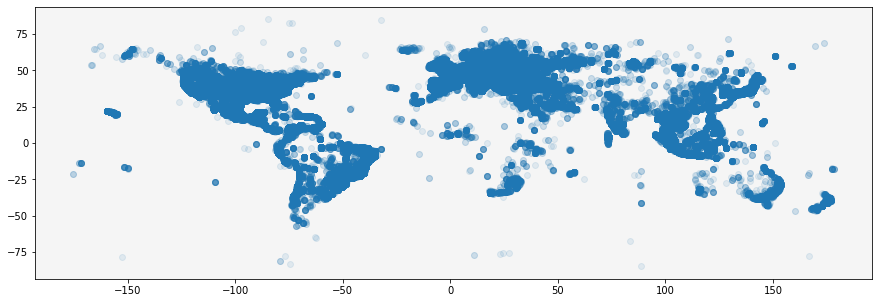

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.scatter(train.longitude, train.latitude, alpha=0.1)
ax.set_facecolor("whitesmoke")

In [23]:
# check lat and lon combinations not on land
globe.is_land(train.latitude, train.longitude).mean()

0.9759898912199731

In [25]:
# let's dive deeper
train["is_land"] = globe.is_land(train.latitude, train.longitude)
train.query("not is_land")

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,is_land
58,E_0003d64daed560,Handhu Runba Cafe',3.593957,72.883635,Machafushi,Alif Dhaal Atoll,North Province,NaN,MV,NaN,NaN,"Sports Bars, Cafés, Asian Restaurants",P_891002c96b7943,False
177,E_000b46561f998b,Maiden's Tower,41.021184,29.004637,NaN,NaN,NaN,NaN,TR,NaN,NaN,Lighthouses,P_81172a3acce011,False
203,E_000d1a3d0cb8f2,Seaport Village,32.711380,-117.170570,849 W Harbor Dr,San Diego,CA,92101,US,http://www.seaportvillage.com,6192354014,Shopping Plazas,P_68ecf7c05770b5,False
250,E_000f09b3d3b359,melih kuafor,41.074154,28.243072,NaN,NaN,NaN,NaN,TR,NaN,NaN,Nail Salons,P_5b1e5a105d3a1e,False
262,E_000f8656a0628d,Fenerbahçe Khalkedon,40.968873,29.037540,NaN,NaN,NaN,NaN,TR,NaN,NaN,NaN,P_e32f1817479a3c,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138722,E_fffa4a022b1a65,Cafe Bob's,14.535262,120.979658,21st Lacson St.,Bacolod City,NaN,6100,PH,NaN,NaN,Cafés,P_f4d73264df261e,False
1138739,E_fffb9429b39d4a,Edwinりんくうプレミアムアウトレット店,34.406755,135.295241,NaN,NaN,NaN,NaN,JP,NaN,NaN,Clothing Stores,P_efa28af2a471a3,False
1138768,E_fffda589438beb,WA237,63.107018,21.591620,NaN,NaN,NaN,NaN,FI,NaN,NaN,College Classrooms,P_4001d1344efd6b,False
1138785,E_fffe6af8682b38,7-Eleven,10.321228,123.933653,"Cebu Doctors University, P.V. Larrazabal Jr. Ave.",Mandaue City,Cebu,6014,PH,NaN,NaN,Convenience Stores,P_020e209abf8d18,False


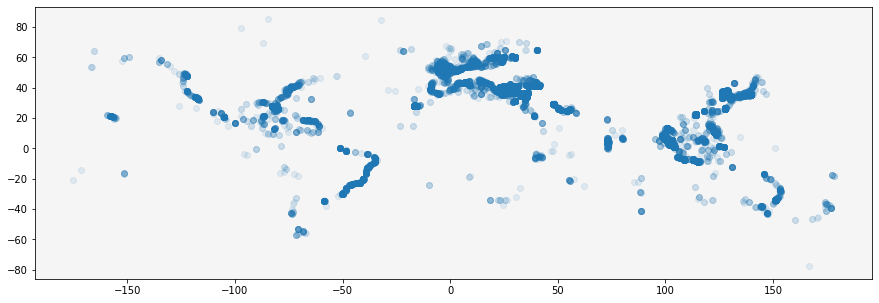

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.scatter(train.query("not is_land").longitude, train.query("not is_land").latitude, alpha=0.1)
ax.set_facecolor("whitesmoke")

In [28]:
"""
-> looks like this is mostly due to roughness of methods, let'S ignore for now
"""

"\n-> looks like this is mostly due to roughness of methods, let'S ignore for now\n"

## phone

In [39]:
train[["country", "phone"]].dropna().values

array([['US', '7074394747'],
       ['JP', '366597676'],
       ['US', '9126292700'],
       ...,
       ['US', '3144344224'],
       ['US', '+16156799940'],
       ['JP', '338362989']], dtype=object)

In [84]:
# we use phone number parsing for making different formats comparable, e.g.
phonenumbers.format_number(phonenumbers.parse('338362989', 'JP'), phonenumbers.PhoneNumberFormat.INTERNATIONAL)

'+81 3-3836-2989'

In [86]:
%%time


def parse_phone_number(phone, country):
        try:
            return phonenumbers.format_number(phonenumbers.parse(str(phone), country), phonenumbers.PhoneNumberFormat.INTERNATIONAL)
        except:
            return np.nan

train["parsed_phone"] = train.apply(
    lambda x: parse_phone_number(x.phone, x.country), axis="columns"
)

train.head(10)

CPU times: user 35.4 s, sys: 295 ms, total: 35.7 s
Wall time: 35.7 s


,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,is_land,parsed_phone
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,NaN,Bars,P_677e840bb6fc7e,True,NaN
1,E_000002eae2a589,Carioca Manero,-22.907225,-43.178244,NaN,NaN,NaN,NaN,BR,NaN,NaN,Brazilian Restaurants,P_d82910d8382a83,True,NaN
2,E_000007f24ebc95,ร้านตัดผมการาเกด,13.780813,100.484900,NaN,NaN,NaN,NaN,TH,NaN,NaN,Salons / Barbershops,P_b1066599e78477,True,NaN
3,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,NaN,Mobile Phone Shops,P_b2ed86905a4cd3,True,NaN
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb,True,NaN
5,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,NaN,Spas,P_020de174484ec6,True,NaN
6,E_00002a131a2bf6,ministry of youth,29.364352,47.971362,NaN,NaN,NaN,NaN,KW,NaN,NaN,Capitol Buildings,P_9e4e64be602c35,True,NaN
7,E_0000764d65557e,McDonald's,-7.265894,112.749382,"Plaza Surabaya, Pemuda Building",NaN,NaN,NaN,ID,NaN,NaN,Fast Food Restaurants,P_be89c778befb23,True,NaN
8,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,7074394747,Sandwich Places,P_aae7505da98d46,True,+1 707-439-4747
9,E_0000890af22ff5,Flohmarkt Am Rathaus Steglitz,52.457045,13.322475,NaN,NaN,NaN,NaN,DE,NaN,NaN,Flea Markets,P_b6bbe6a8990f34,True,NaN


In [102]:
# non-parsable phone numbers are rare, let's check all of them
pd.options.display.max_rows = 200

train[~(train.phone).isna() & (train.parsed_phone).isna()]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,is_land,parsed_phone
4341,E_0100a9bf91e6ab,베스킨라빈스(영등포홈플러스),37.518452,126.895576,서울특별시,영등포구 문래동3가,NaN,NaN,XX,NaN,02 2632 9753,Ice Cream Shops,P_90a35b9fec60b2,True,NaN
9495,E_02280541425fb7,Кредит Европа Банк,55.034339,82.903230,"Вокзальная магистраль, дом 3",Новосибирск,NaN,NaN,RU,http://www.crediteurope.ru,(383) 249-40-30 (383) 249-40-60,Banks,P_d2418e9d2b9c32,True,NaN
10256,E_025583f1c5a4d9,Flushing Meadows Resort and Playground,9.649677,123.848245,Dauis,Dauis,Central Visayas,NaN,PH,NaN,6338502212263385022122639173043057,Hotels,P_9b69103ee159dd,True,NaN
24873,E_0593ae90defdf8,Dantur Turismo,-22.907112,-43.177654,"Av. Rio Branco, 156 Subsolo loja 134",Rio de Janeiro,RJ,NaN,BR,NaN,21226234242122623624,Travel & Transport,P_5f47a3b5cb0655,True,NaN
30254,E_06c63f762ca765,Farmacias del Ahorro,16.756869,-93.127215,1A AV NORTE PTE 1408 COL. MOCTEZUMA,TUXTLA GUTIERREZ,CHIAPAS,29030,MX,http://www.fahorro.com,S/N,Pharmacies,P_a5ab6570a5551e,True,NaN
33792,E_0790cf7e60b85f,Кредит Европа Банк,55.021775,82.916826,"ул. Советская, д.5, 6 этаж",Новосибирск,NaN,NaN,RU,http://www.crediteurope.ru,(383) 2492000 (383) 2492101 (383) 2492303,Banks,P_47b6da4d7fc02b,True,NaN
44000,E_09da88f92f4057,Farmacias del Ahorro,19.691197,-101.224822,AV. JOSE TOCABEN LAVIN 1382 COL. AGUSTIN ARRIA...,MORELIA,MICHOACAN,58190,MX,http://www.fahorro.com,S/N,Pharmacies,P_a33e5135a7bb07,True,NaN
47693,E_0aab61fb43a8b6,Lakan Pakals Inland Resort,7.429094,125.795781,National Highway,Tagum City,Davao Region,NaN,PH,NaN,63842173792639202981318,"Resorts, Hotels, Pools",P_aa7757fa1748b2,True,NaN
49261,E_0b0330daf39e68,Garanti BBVA,37.467780,30.564250,As ÇİMENTO Fabri̇kasi ÖNÜ,Bucak,Burdur,NaN,TR,http://www.garanti.com.tr,0,Banks,P_3666ecd7d19c01,True,NaN
50746,E_0b5c61331f29e1,บอนไทร,18.802256,98.968369,แยกรินคำ,NaN,NaN,NaN,TH,NaN,08975561560819806156,Bars,P_7a2b1c96a8aed4,True,NaN
